Import Libraries

In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt 
import tensorflow_docs as tfdocs
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
import tensorflow_docs.modeling
import tensorflow_docs.plots

Load and prepare dataset

In [3]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

2816417792/2816407858 [==============================] - 124s 0us/step


In [4]:
FEATURES = 28
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

packed_ds = ds.batch(10000).map(pack_row).unbatch()

In [5]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [6]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

Simple model

In [7]:
def get_callbacks():
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200),
    TensorBoard(log_dir='logs_higgs')
  ]

In [8]:
def compile_and_fit(model, max_epochs=10000):
  model.compile(optimizer="adam",
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(),
    verbose=0)
  return history

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                464       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4875,  binary_crossentropy:0.8242,  loss:0.8242,  val_accuracy:0.5130,  val_binary_crossentropy:0.7799,  val_loss:0.7799,  
....................................................................................................
Epoch: 100, accuracy:0.5974,  binary_crossentropy:0.6256,  loss:0.6256,  val_accuracy:0.5640,  val_binary_crossentropy:0.6292,  val_loss:0.6292,  
..........................................................

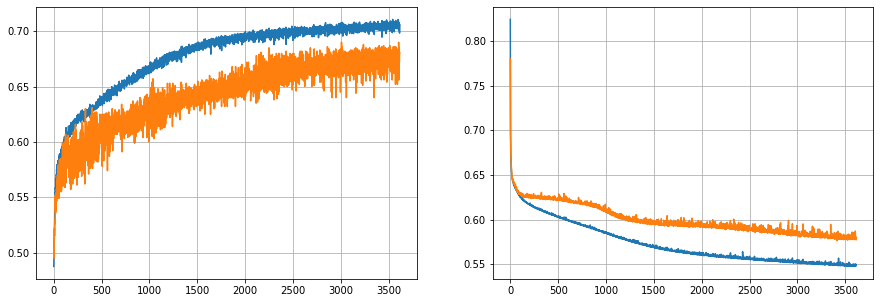

In [ ]:
model_1 = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)])
his = compile_and_fit(model_1)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                928       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4883,  binary_crossentropy:0.7817,  loss:0.7817,  val_accuracy:0.4730,  val_binary_crossentropy:0.7281,  val_loss:0.7281,  
....................................................................................................
Epoch: 100, accuracy:0.6132,  binary_crossentropy:0.6168,  loss:0.6168,  val_accuracy:0.5940,  val_binary_crossentropy:0.6183,  val_loss:0.6183,  
..........................................................

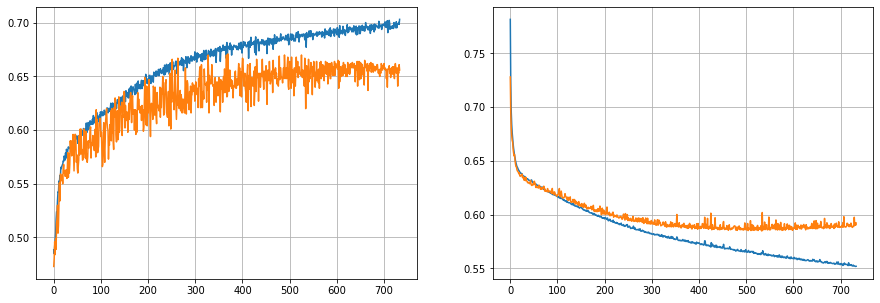

In [ ]:
model_2 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)])
his = compile_and_fit(model_2)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                1856      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4884,  binary_crossentropy:0.7493,  loss:0.7493,  val_accuracy:0.4710,  val_binary_crossentropy:0.7193,  val_loss:0.7193,  
....................................................................................................
Epoch: 100, accuracy:0.6152,  binary_crossentropy:0.6129,  loss:0.6129,  val_accuracy:0.6100,  val_binary_crossentropy:0.6156,  val_loss:0.6156,  
......................................................

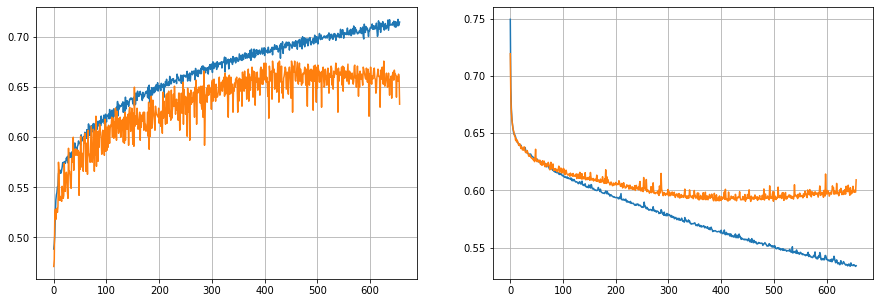

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)])
his = compile_and_fit(model_3)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                928       
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4841,  binary_crossentropy:0.7164,  loss:0.7164,  val_accuracy:0.4580,  val_binary_crossentropy:0.7114,  val_loss:0.7114,  
....................................................................................................
Epoch: 100, accuracy:0.6306,  binary_crossentropy:0.6038,  loss:0.6038,  val_accuracy:0.6050,  val_binary_crossentropy:0.6246,  val_loss:0.6246,  
..........................................................

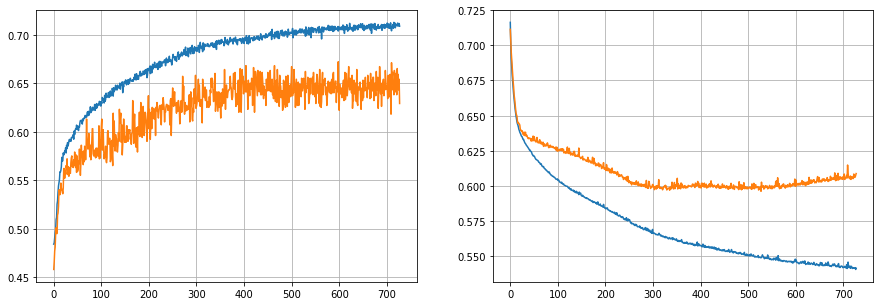

In [ ]:
model_4 = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(FEATURES,)),
    layers.Dense(1)])
his = compile_and_fit(model_4)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 32)                928       
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4924,  binary_crossentropy:0.7213,  loss:0.7213,  val_accuracy:0.5040,  val_binary_crossentropy:0.6911,  val_loss:0.6911,  
....................................................................................................
Epoch: 100, accuracy:0.6420,  binary_crossentropy:0.5976,  loss:0.59

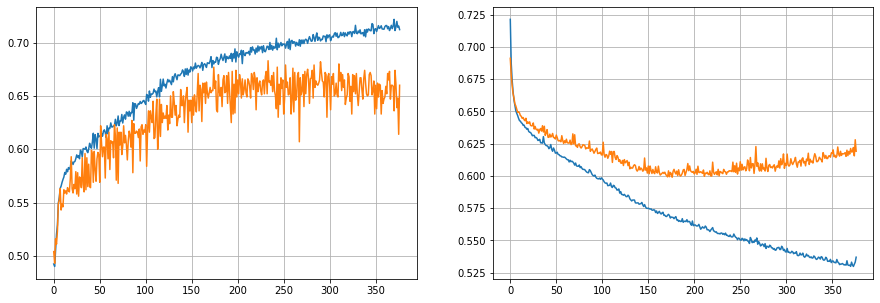

In [ ]:
model_5 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(32, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_5)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                928       
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4895,  binary_crossentropy:0.7233,  loss:0.7263,  val_accuracy:0.4660,  val_binary_crossentropy:0.6972,  val_loss:0.7002,  
....................................................................................................
Epoch: 100, accuracy:0.6608,  binary_crossentropy:0.5886,  loss:0.59

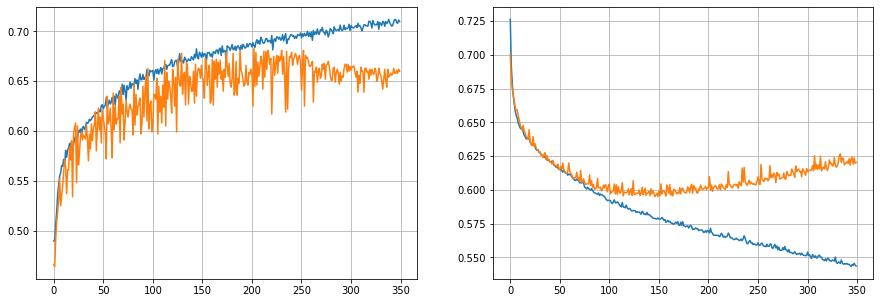

In [ ]:
model_6 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(32, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_6)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                928       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 32)                1056      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.5018,  binary_crossentropy:0.8112,  loss:0.8144,  val_accuracy:0.5620,  val_binary_crossentropy:0.7142,  val_loss:0.7175,  
.....................................

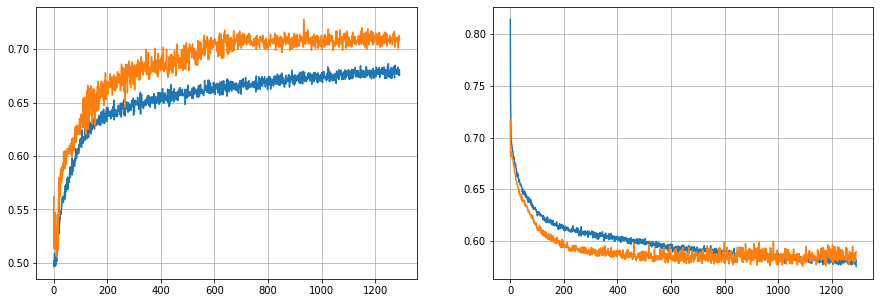

In [ ]:
model_7 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_7)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 32)                928       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_54 (Dense)            (None, 32)                1056      
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4830,  binary_crossentropy:0.7797,  loss:0.7857,  val_accuracy:0.4700,  val_binary_crossentropy:0.7005,  val_loss:0.7065,  
.....................................

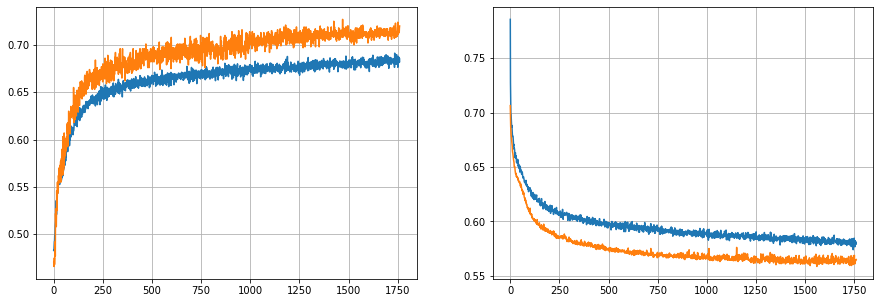

In [ ]:
model_8 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)])
his = compile_and_fit(model_8)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 32)                928       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_58 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,017
Trainable params: 2,017
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4933,  binary_crossentropy:0.

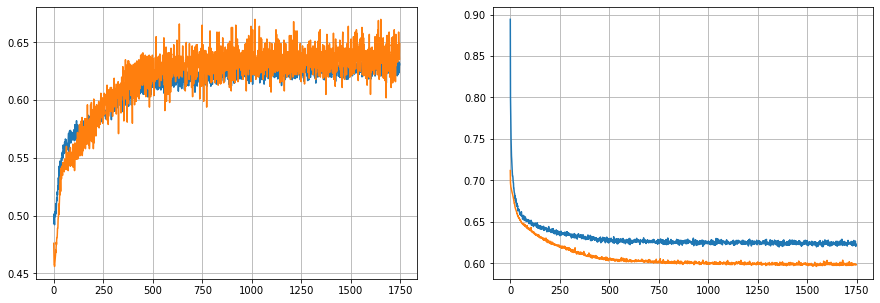

In [ ]:
model_9 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1)])
his = compile_and_fit(model_9)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 64)                1856      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_84 (Dense)            (None, 64)                4160      
                                                                 
 dense_85 (Dense)            (None, 1)                 65        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4794,  binary_crossentropy:0.7764,  loss:0.7867,  val_accuracy:0.4590,  val_binary_crossentropy:0.6894,  val_loss:0.6997,  
.....................................

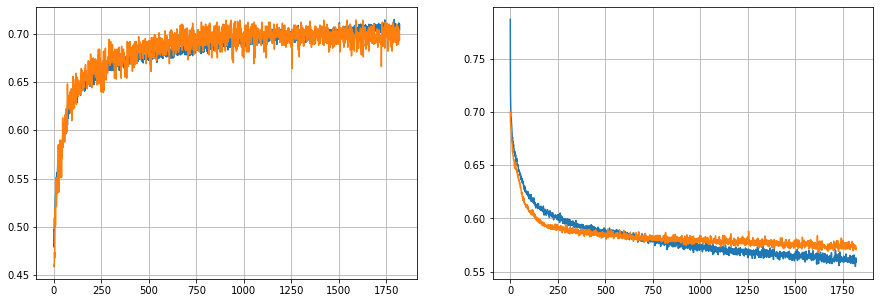

In [ ]:
model_10 = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='elu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)])
his = compile_and_fit(model_10)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 32)                928       
                                                                 
 dropout_23 (Dropout)        (None, 32)                0         
                                                                 
 dense_115 (Dense)           (None, 32)                1056      
                                                                 
 dense_116 (Dense)           (None, 32)                1056      
                                                                 
 dense_117 (Dense)           (None, 32)                1056      
                                                                 
 dense_118 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,129
Trainable params: 4,129
Non-train

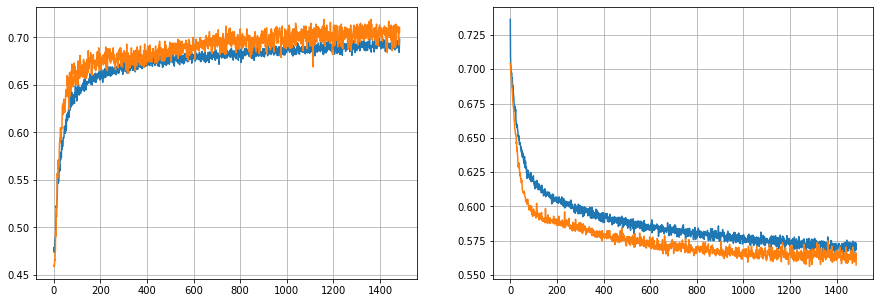

In [ ]:
model_11 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(32, activation='elu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(32, activation='elu',kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)])
his = compile_and_fit(model_11)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 32)                928       
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_149 (Dense)           (None, 32)                1056      
                                                                 
 dense_150 (Dense)           (None, 32)                1056      
                                                                 
 dense_151 (Dense)           (None, 32)                1056      
                                                                 
 dense_152 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,129
Trainable params: 4,129
Non-train

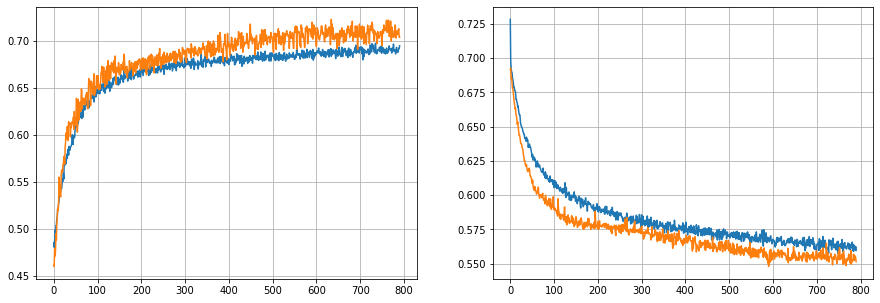

In [ ]:
model_12 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_12)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                928       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               4224      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 25,825
Trainable params: 25,825
Non-trai

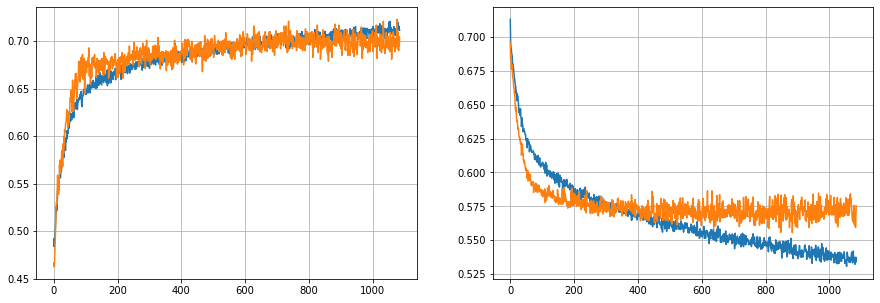

In [11]:
model_13 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='elu'),
    layers.Dense(128, activation='elu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_13)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                928       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               4224      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 32)               

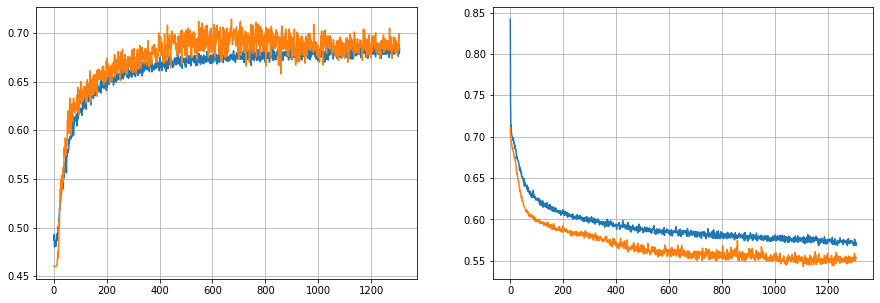

In [14]:
model_14 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_14)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 32)                928       
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_75 (Dense)            (None, 128)               4224      
                                                                 
 dense_76 (Dense)            (None, 128)               16512     
                                                                 
 dense_77 (Dense)            (None, 32)                4128      
                                                                 
 dense_78 (Dense)            (None, 1)                 33        
                                                                 
Total params: 25,825
Trainable params: 25,825
Non-tra

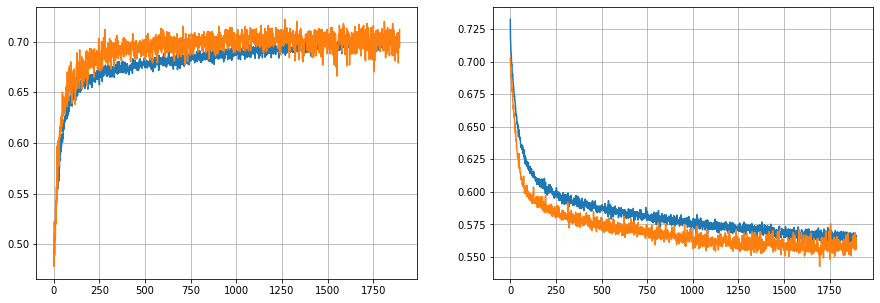

In [23]:
model_15 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='elu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(128, activation='elu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(32, activation='elu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)])
his = compile_and_fit(model_15)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 32)                928       
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_90 (Dense)            (None, 32)                1056      
                                                                 
 dense_91 (Dense)            (None, 64)                2112      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_92 (Dense)            (None, 64)                4160      
                                                                 
 dense_93 (Dense)            (None, 1)               

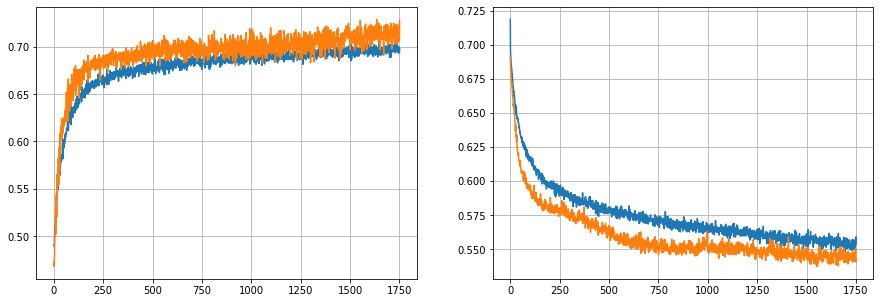

In [26]:
model_16 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_16)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 32)                928       
                                                                 
 dropout_31 (Dropout)        (None, 32)                0         
                                                                 
 dense_120 (Dense)           (None, 64)                2112      
                                                                 
 dense_121 (Dense)           (None, 32)                2080      
                                                                 
 dense_122 (Dense)           (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.4830,  binary_crossentropy:0.

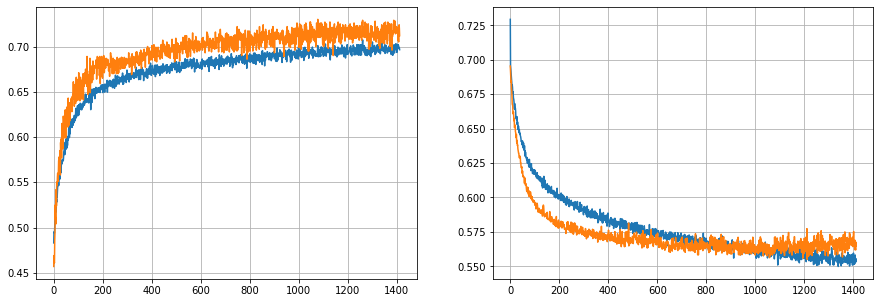

In [33]:
model_17 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='elu'),
    layers.Dense(32, activation='elu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(1)])
his = compile_and_fit(model_17)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 32)                928       
                                                                 
 dropout_35 (Dropout)        (None, 32)                0         
                                                                 
 dense_140 (Dense)           (None, 64)                2112      
                                                                 
 dense_141 (Dense)           (None, 32)                2080      
                                                                 
 dense_142 (Dense)           (None, 64)                2112      
                                                                 
 dense_143 (Dense)           (None, 1)                 65        
                                                                 
Total params: 7,297
Trainable params: 7,297
Non-train

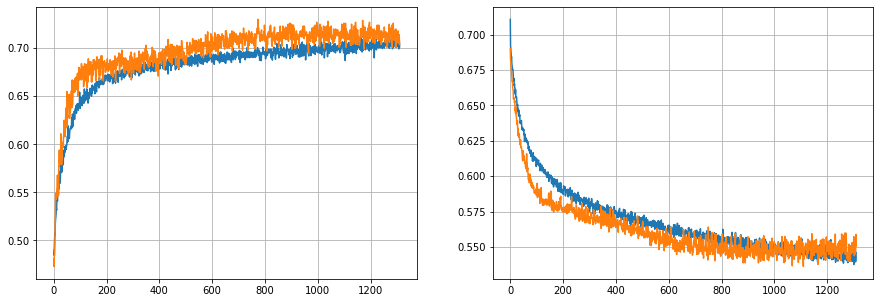

In [37]:
model_18 = tf.keras.Sequential([
    layers.Dense(32, activation='elu', input_shape=(FEATURES,), kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='elu'),
    layers.Dense(32, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)])
his = compile_and_fit(model_18)

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.grid(True)
plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs_higgs